In [16]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def carregar_dados(db_name, tabela_nome):
    """Carrega dados de uma tabela específica do banco de dados SQLite."""
    conn = sqlite3.connect(db_name)
    df = pd.read_sql(f'SELECT * FROM {tabela_nome}', conn)
    conn.close()
    return df

def converter_timestamp(df):
    """Converte a coluna de timestamp para datetime em UTC."""
    df['datetime'] = pd.to_datetime(df['timestamp'], unit='s', utc=True)
    return df


def explorar_dados(df, nome_tabela):
    """Realiza a análise exploratória básica da tabela."""
    print(f"Análise Exploratória da Tabela: {nome_tabela}\n")
    
    # Exibir as primeiras e ultimas linhas do DataFrame
    print("Primeiras linhas:")
    print(df.head(), "\n")
    print("Últimas linhas:")
    print(df.tail(), "\n")
    
    # Exibir informações sobre o DataFrame
    print("Informações do DataFrame:")
    print(df.info(), "\n")
    
    # Exibir estatísticas descritivas
    print("Estatísticas Descritivas:")
    print(df.describe(include='all'), "\n")
    
    # Análise de valores nulos
    print("Valores Nulos:")
    print(df.isnull().sum(), "\n")
    
    # Análise das colunas categóricas
    for col in ['client', 'server']:
        print(f"Distribuição da coluna '{col}':")
        print(df[col].value_counts(), "\n")
    
    # Boxplot da coluna que tem o mesmo nome da tabela
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=df[nome_tabela])
    plt.title(f'Boxplot de {nome_tabela}')
    plt.xlabel(nome_tabela)
    plt.show()

def plotar_por_par(df, nome_tabela, client, server):
    """Plota a coluna em função do timestamp para um par cliente-servidor específico."""
    # Filtrar os dados pelo par cliente-servidor
    df_filtered = df[(df['client'] == client) & (df['server'] == server)]
    
    # Criação da figura com um único subplot
    fig, ax = plt.subplots(figsize=(10, 5))
    
    # Plot da coluna em função do timestamp para o par cliente-servidor
    ax.stem(df_filtered['datetime'], df_filtered[nome_tabela], basefmt=" ")
    ax.set_title(f'Cliente: {client}, Servidor: {server}')
    ax.set_xlabel('Hora do Dia (UTC)')
    ax.set_ylabel(nome_tabela)
    
    # Ajustes finais
    plt.tight_layout()
    plt.show()

def filtrar_intervalo(df, inicio, fim):
    """
    Filtra os dados entre um intervalo de tempo específico.

    Parâmetros:
    - df: DataFrame com a coluna 'datetime'.
    - inicio: string ou datetime que define o início do intervalo (formato 'YYYY-MM-DD HH:MM').
    - fim: string ou datetime que define o fim do intervalo (formato 'YYYY-MM-DD HH:MM').

    Retorna:
    - DataFrame filtrado pelo intervalo de tempo especificado.
    """
    # Converter as strings de data/hora para objetos datetime, se necessário
    if isinstance(inicio, str):
        inicio = pd.to_datetime(inicio, utc=True)
    if isinstance(fim, str):
        fim = pd.to_datetime(fim, utc=True)

    # Filtragem dos dados entre as datas e horas especificadas
    df_filtered = df[(df['datetime'] >= inicio) & (df['datetime'] <= fim)]
    
    print(f"Número de linhas após a filtragem: {len(df_filtered)}")
    return df_filtered

In [10]:
db_name = 'trabalho_raw.db'
bitrate_df = carregar_dados(db_name, 'bitrate_train')
rtt_df = carregar_dados(db_name, 'rtt_train')
bitrate_df = converter_timestamp(bitrate_df)
rtt_df = converter_timestamp(rtt_df)

Análise Exploratória da Tabela: bitrate

Primeiras linhas:
  client server   timestamp  bitrate                  datetime
0     ba     ce  1717718915     3000 2024-06-07 00:08:35+00:00
1     ba     ce  1717718916    66910 2024-06-07 00:08:36+00:00
2     ba     ce  1717718916   294878 2024-06-07 00:08:36+00:00
3     ba     ce  1717718916   351151 2024-06-07 00:08:36+00:00
4     ba     ce  1717718916   329464 2024-06-07 00:08:36+00:00 

Últimas linhas:
       client server   timestamp  bitrate                  datetime
159025     rj     pi  1718163488   397971 2024-06-12 03:38:08+00:00
159026     rj     pi  1718163488   302730 2024-06-12 03:38:08+00:00
159027     rj     pi  1718163488   329908 2024-06-12 03:38:08+00:00
159028     rj     pi  1718163488   378055 2024-06-12 03:38:08+00:00
159029     rj     pi  1718163488   324403 2024-06-12 03:38:08+00:00 

Informações do DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159030 entries, 0 to 159029
Data columns (total 5 columns):

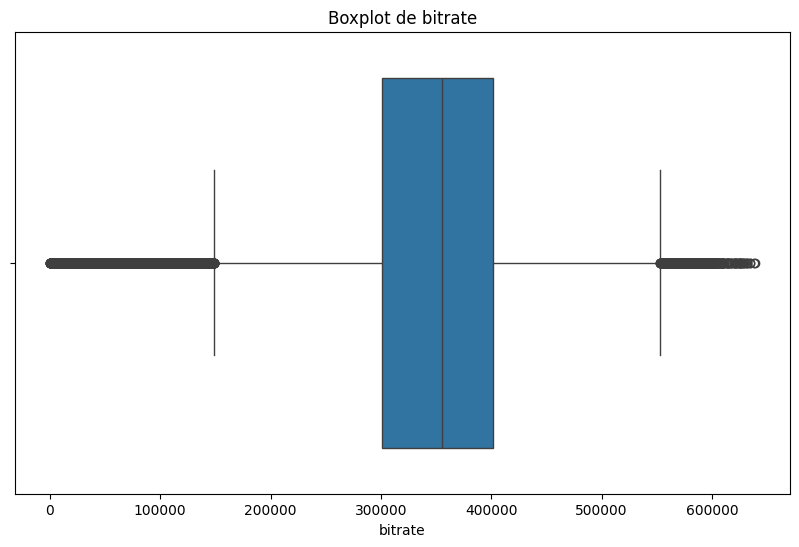

In [3]:
explorar_dados(bitrate_df, 'bitrate')

Análise Exploratória da Tabela: rtt

Primeiras linhas:
  client server   timestamp    rtt                  datetime
0     ba     ce  1717718941  12.52 2024-06-07 00:09:01+00:00
1     ba     ce  1717719217  12.59 2024-06-07 00:13:37+00:00
2     ba     ce  1717719722  12.49 2024-06-07 00:22:02+00:00
3     ba     ce  1717719841  12.49 2024-06-07 00:24:01+00:00
4     ba     ce  1717720185  12.48 2024-06-07 00:29:45+00:00 

Últimas linhas:
      client server   timestamp    rtt                  datetime
10896     rj     pi  1718204387  41.94 2024-06-12 14:59:47+00:00
10897     rj     pi  1718204648  41.91 2024-06-12 15:04:08+00:00
10898     rj     pi  1718204852  41.94 2024-06-12 15:07:32+00:00
10899     rj     pi  1718205282  41.91 2024-06-12 15:14:42+00:00
10900     rj     pi  1718206814  38.19 2024-06-12 15:40:14+00:00 

Informações do DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10901 entries, 0 to 10900
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dty

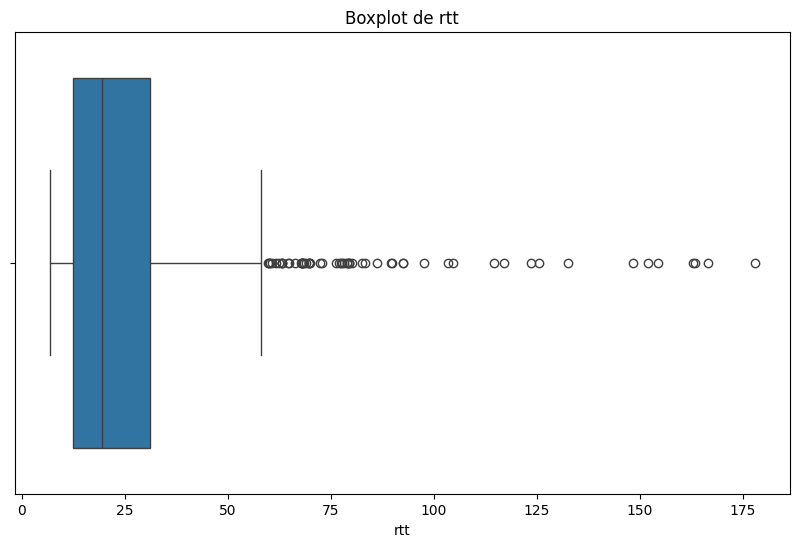

In [4]:
explorar_dados(rtt_df, 'rtt')

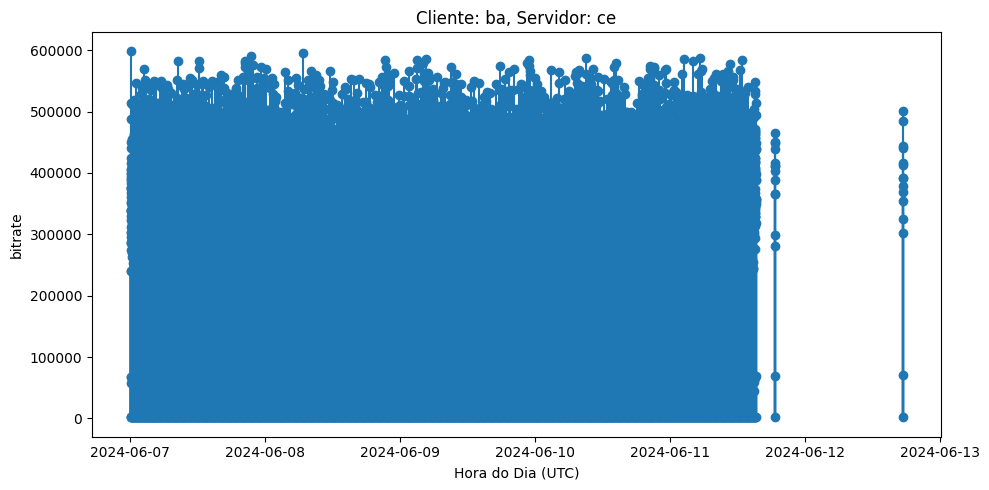

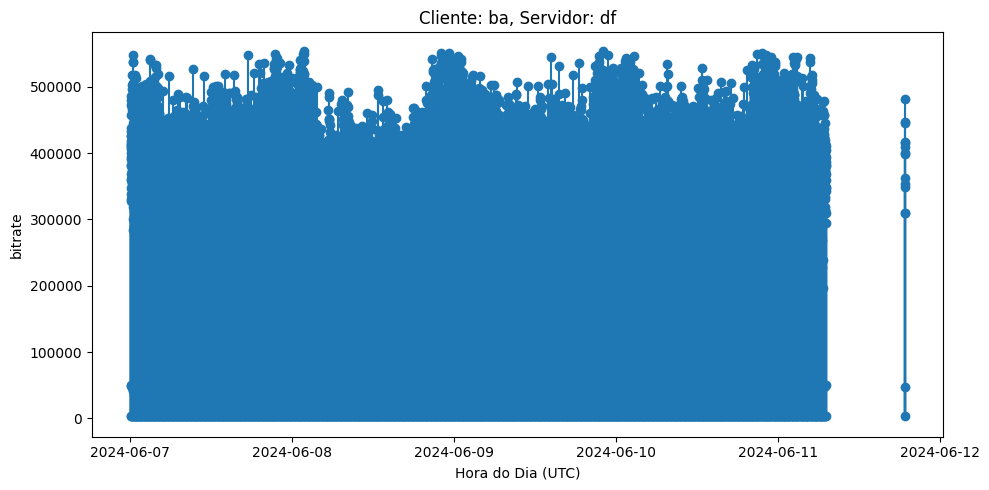

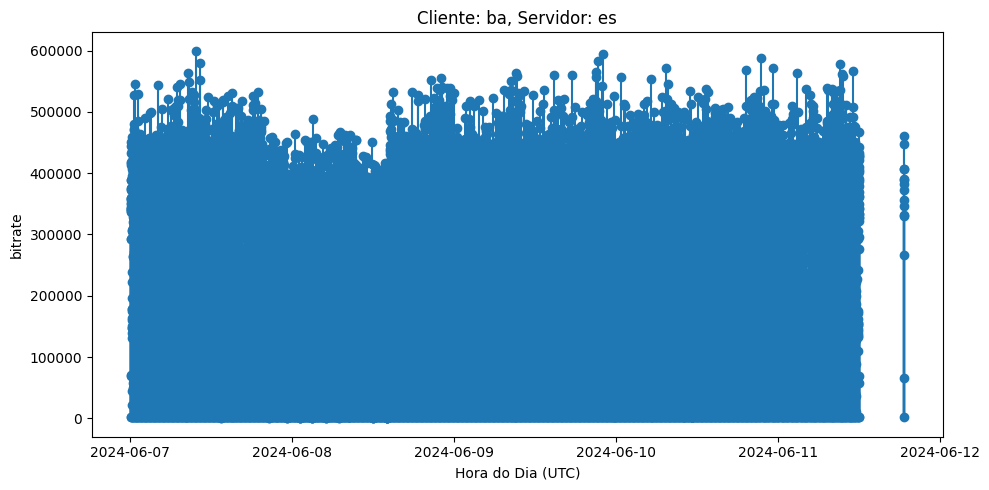

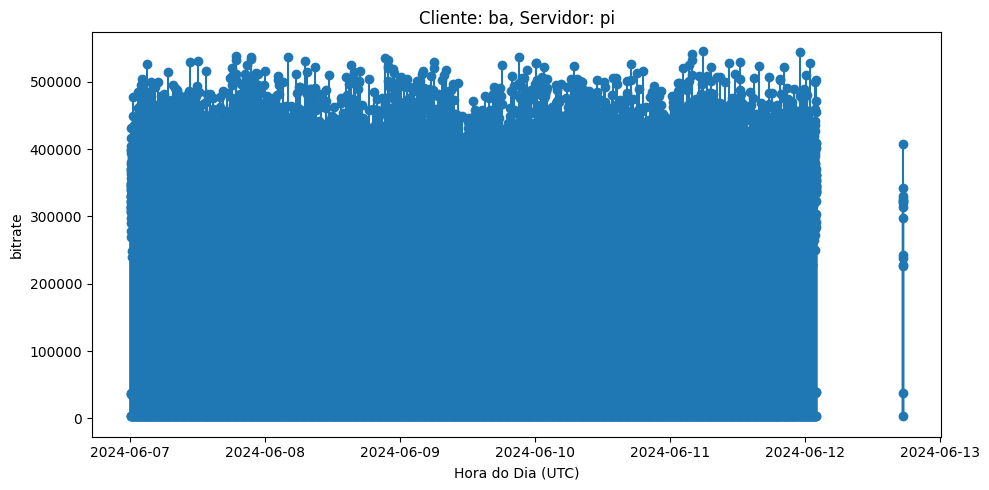

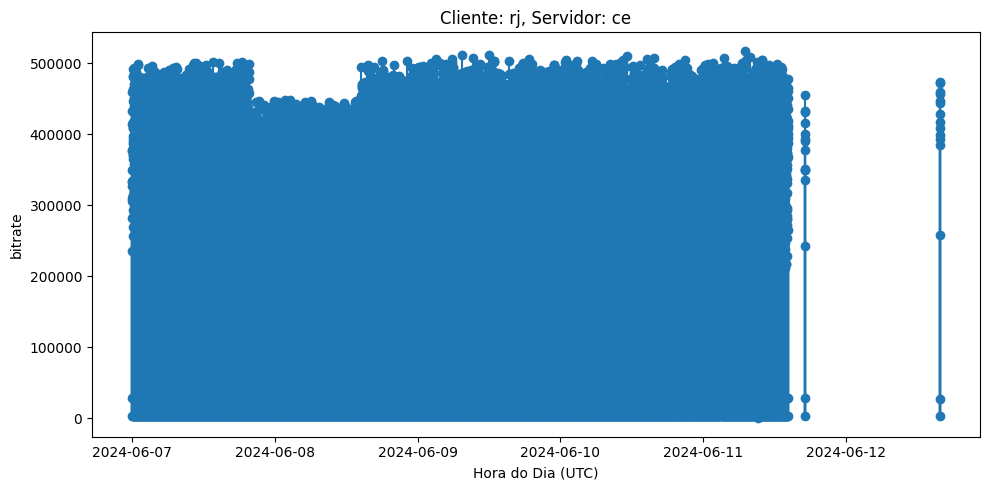

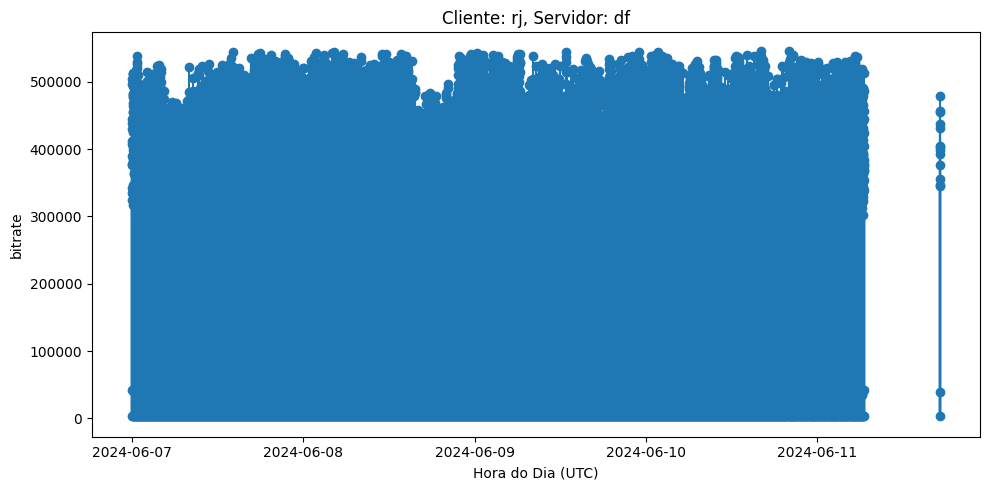

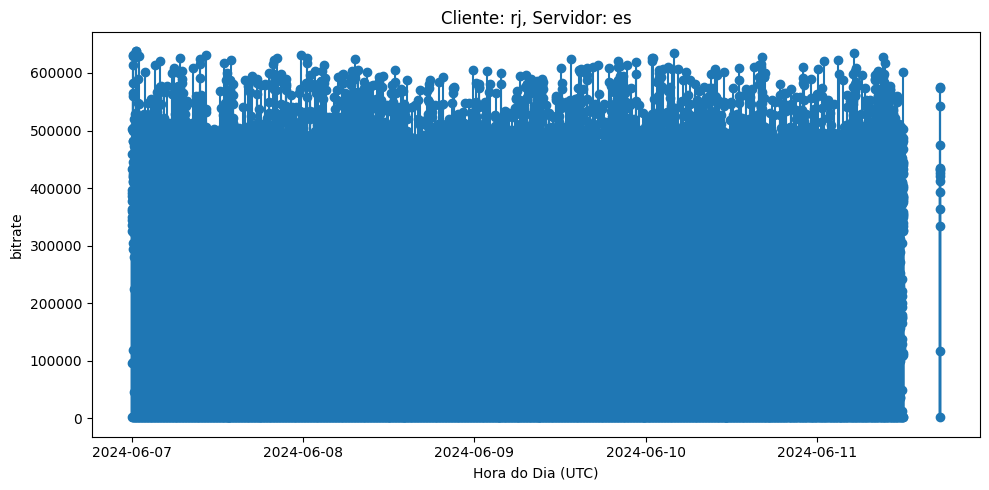

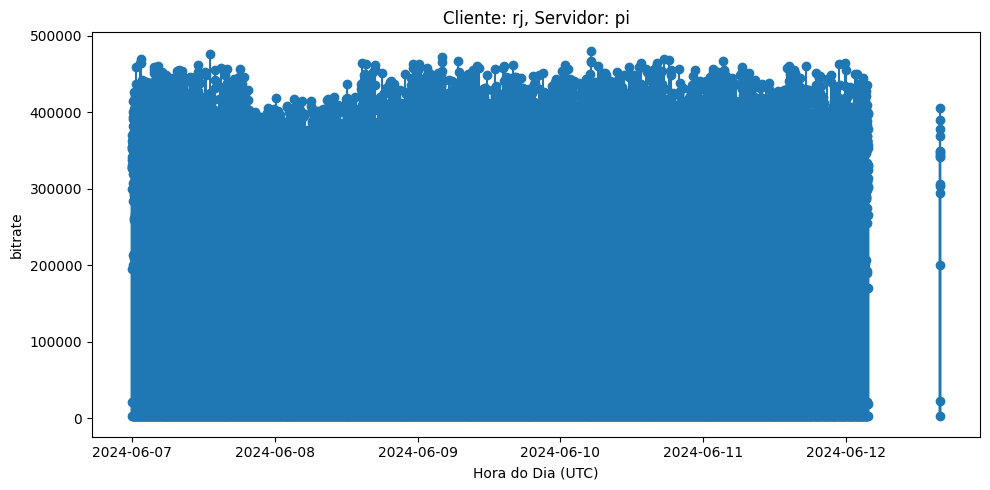

In [17]:
pares = bitrate_df[['client', 'server']].drop_duplicates()
for _, par in pares.iterrows():
    client = par['client']
    server = par['server']
    plotar_por_par(bitrate_df, 'bitrate', client, server)

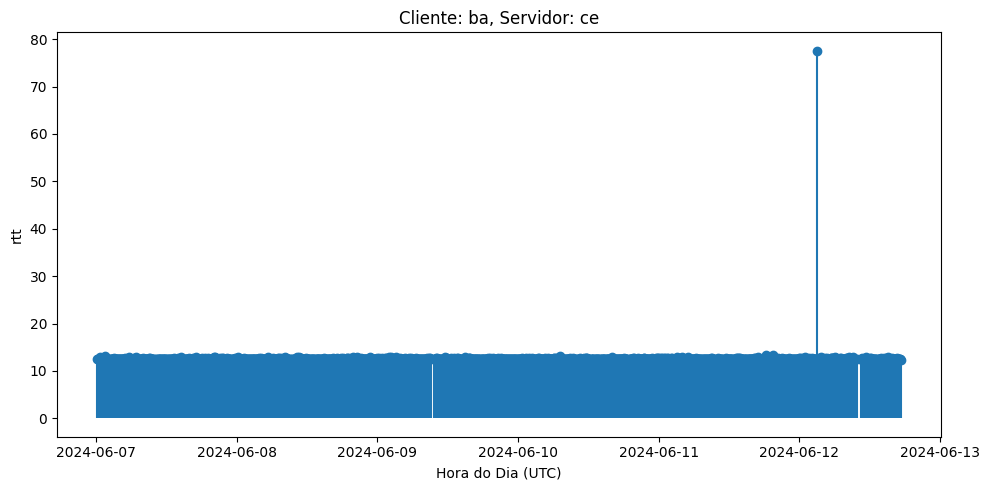

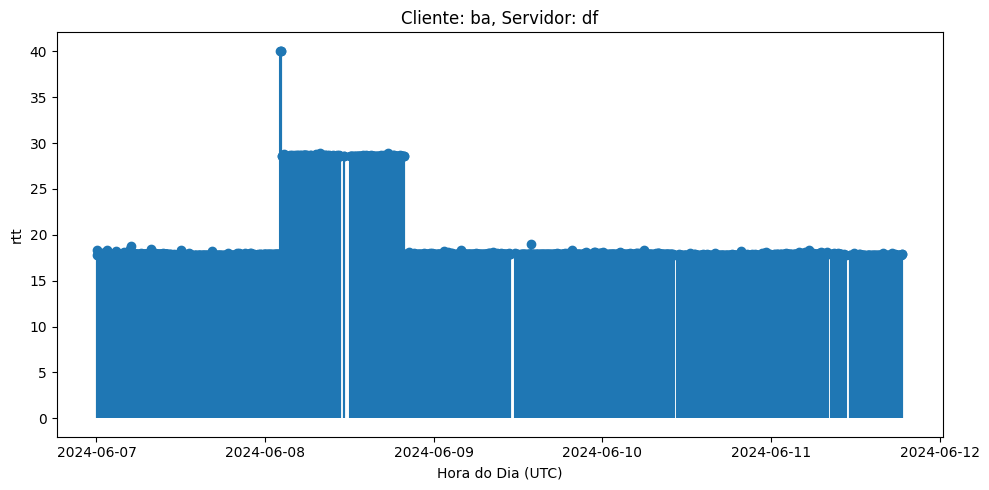

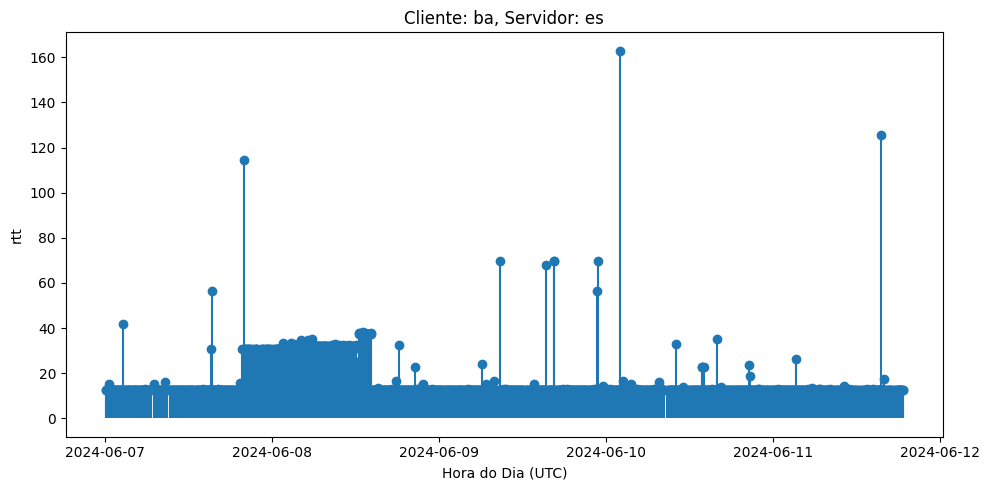

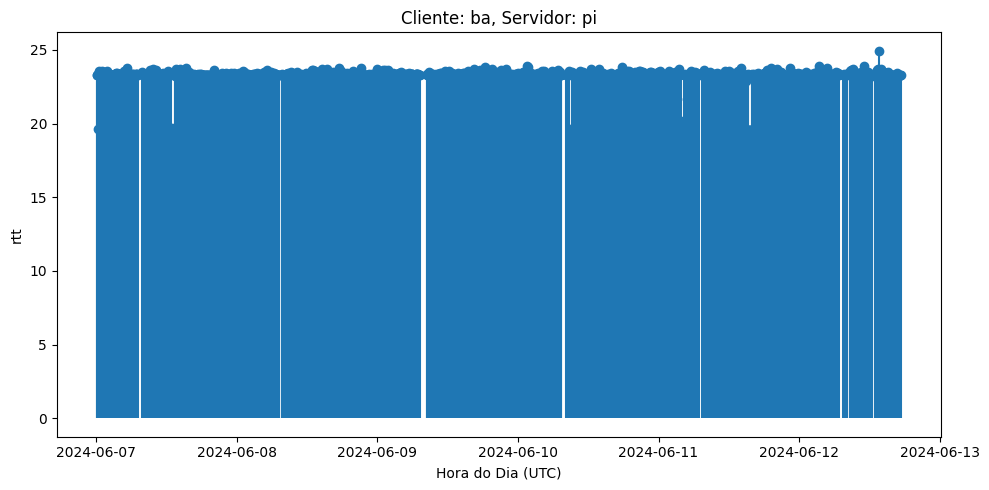

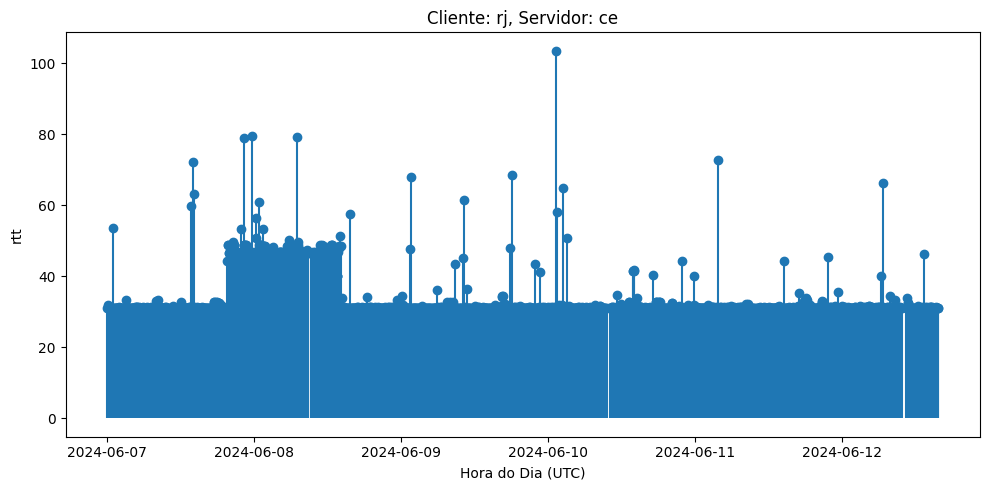

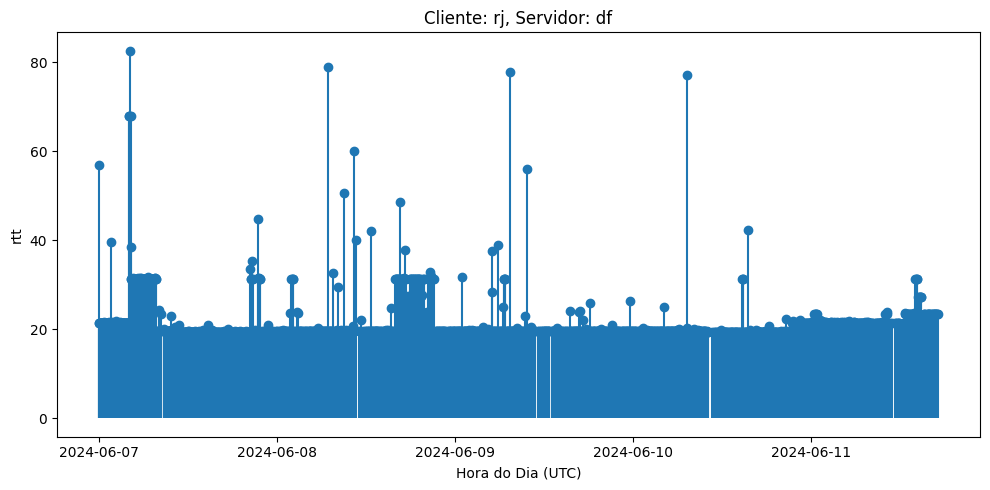

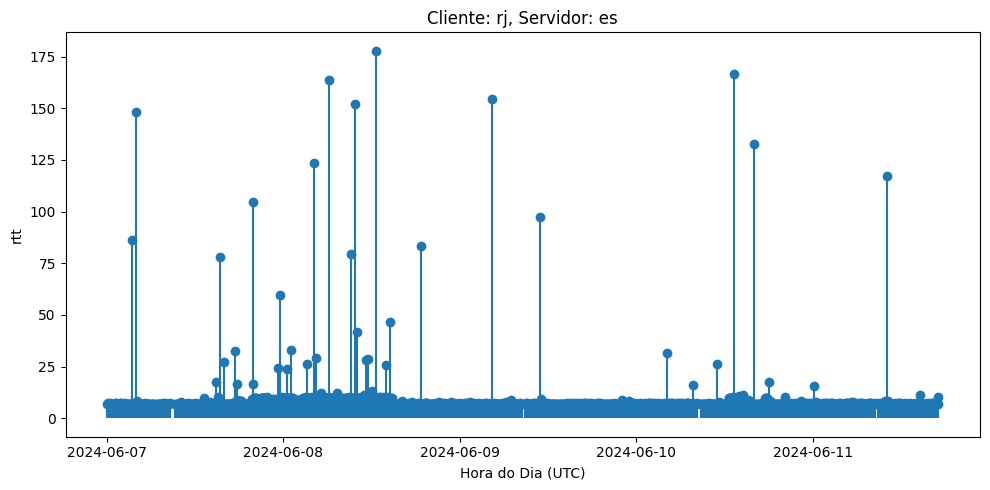

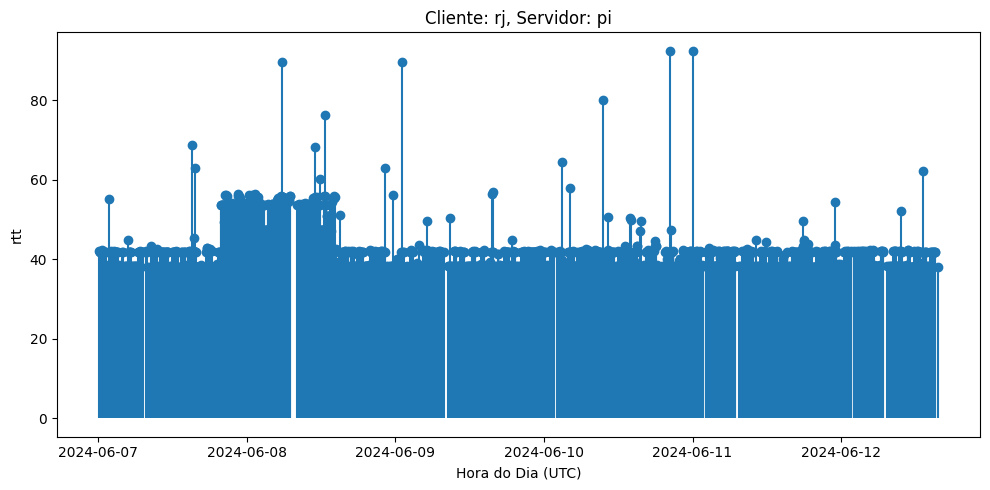

In [19]:
pares = rtt_df[['client', 'server']].drop_duplicates()
for _, par in pares.iterrows():
    client = par['client']
    server = par['server']
    plotar_por_par(rtt_df, 'rtt', client, server)

Número de linhas após a filtragem: 1410
Número de linhas após a filtragem: 77


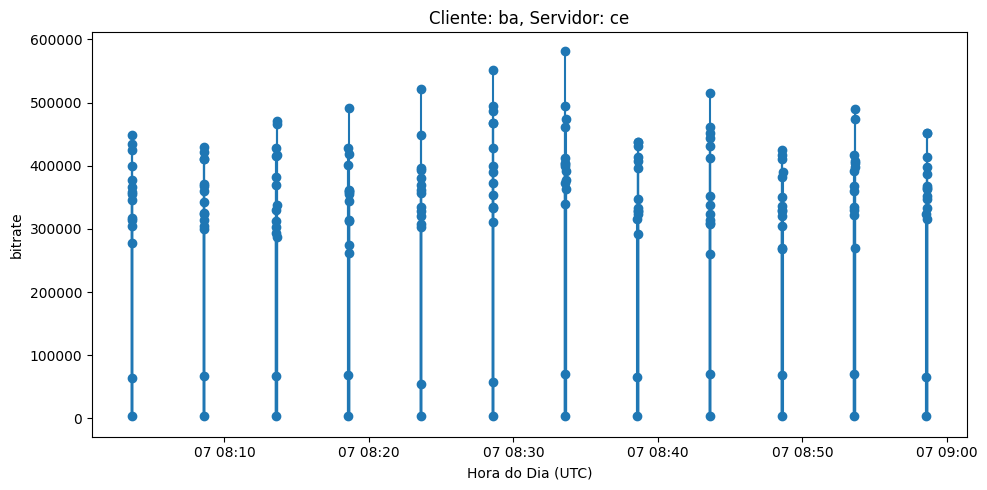

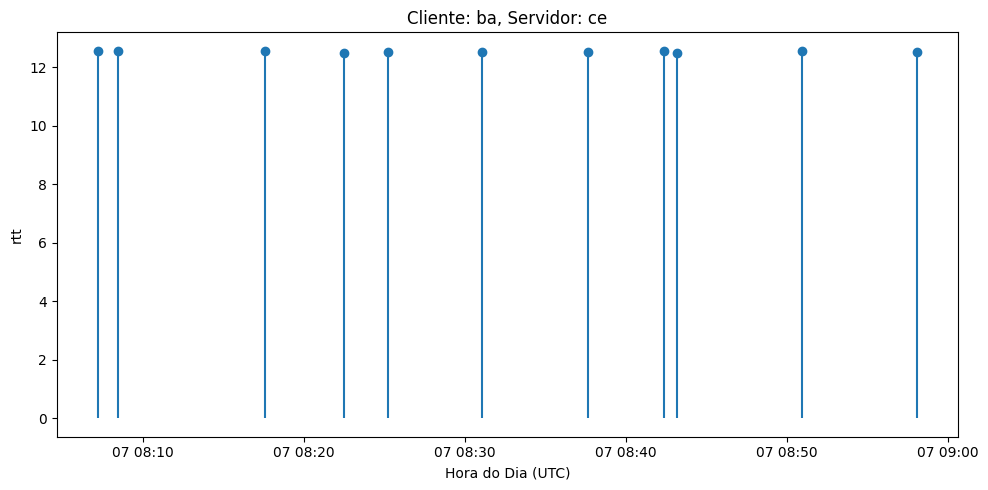

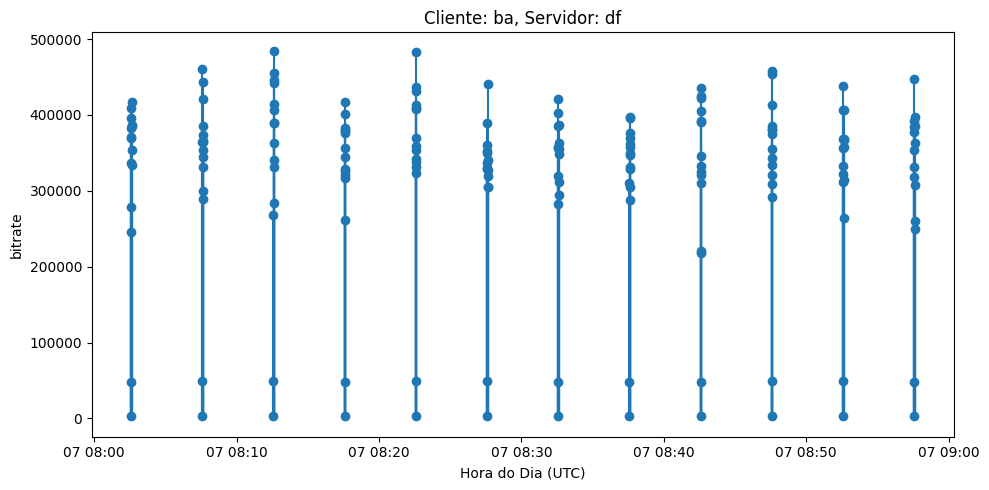

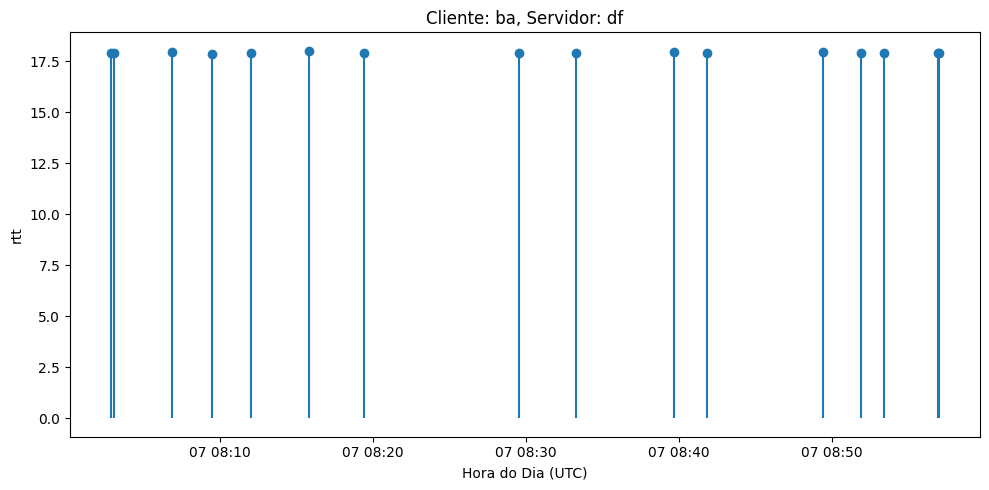

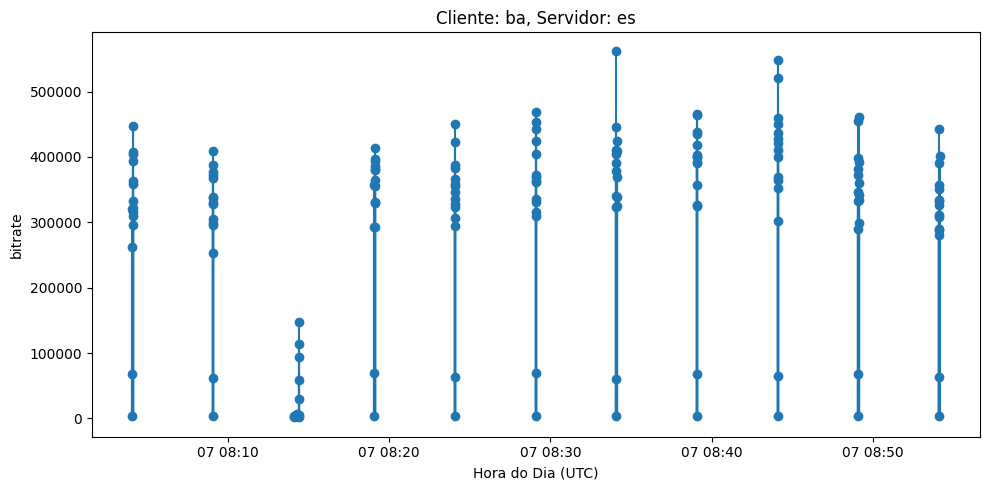

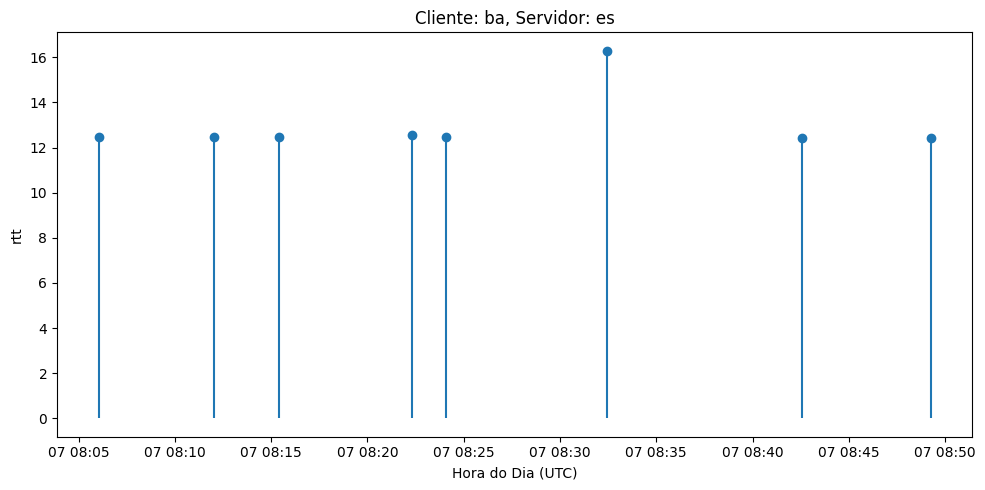

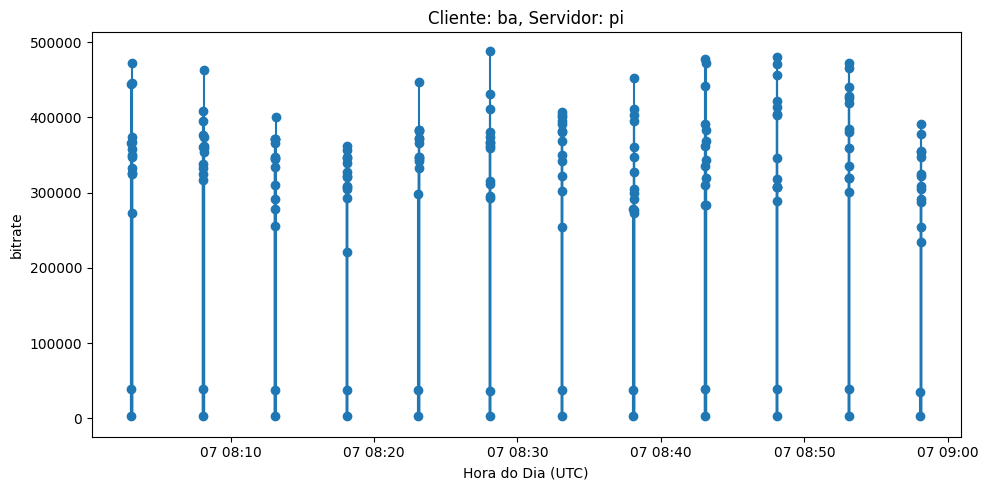

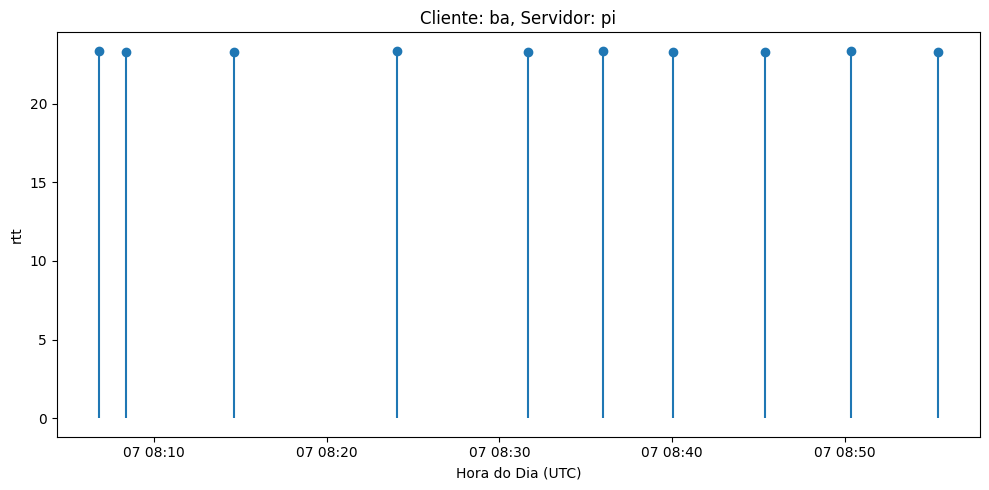

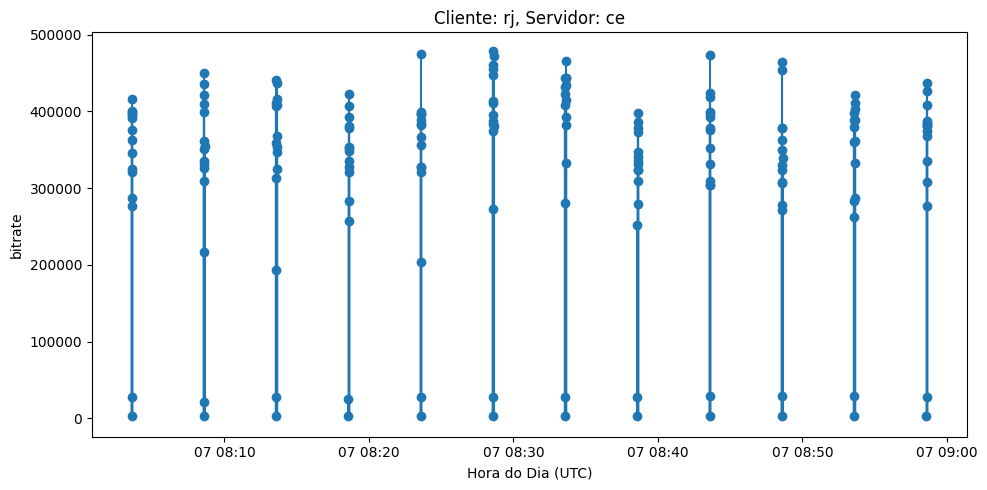

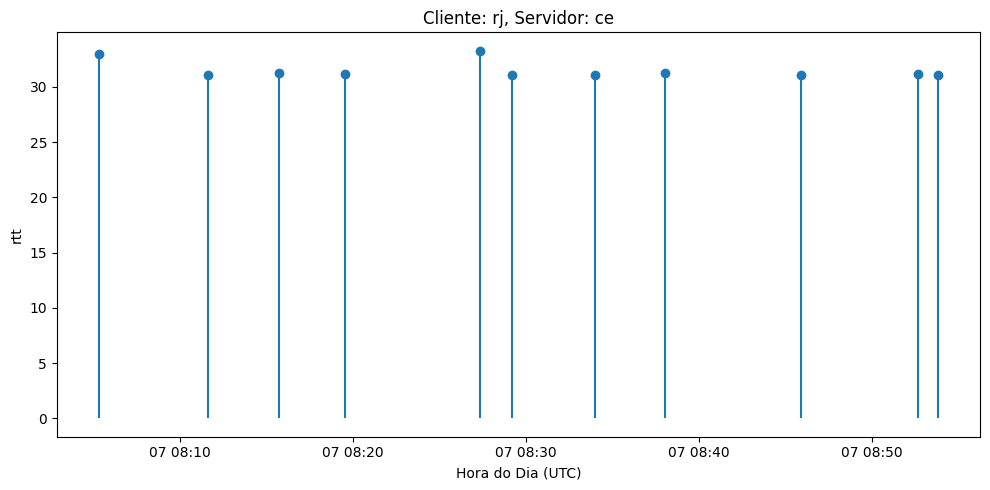

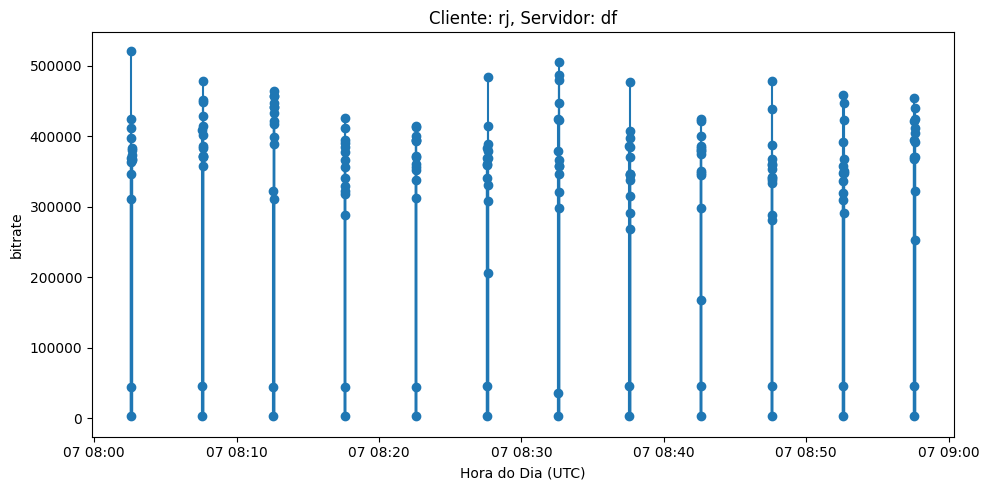

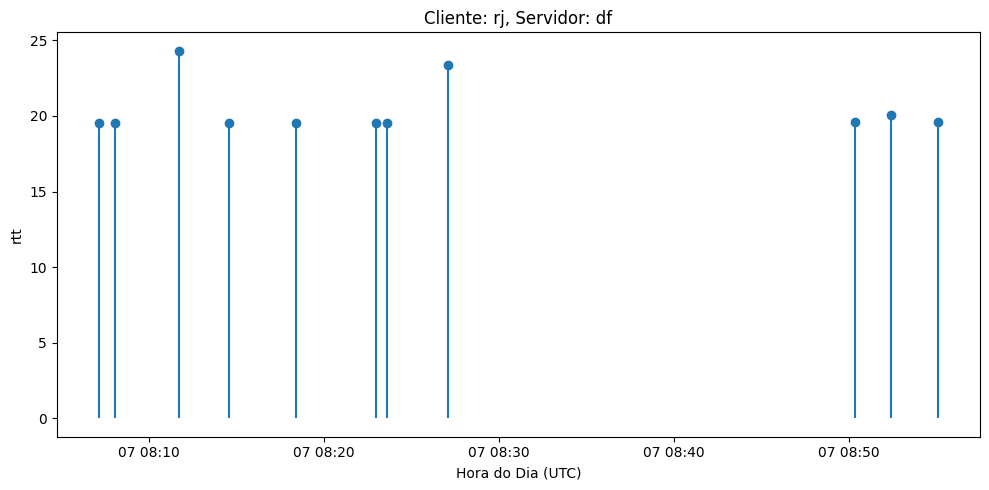

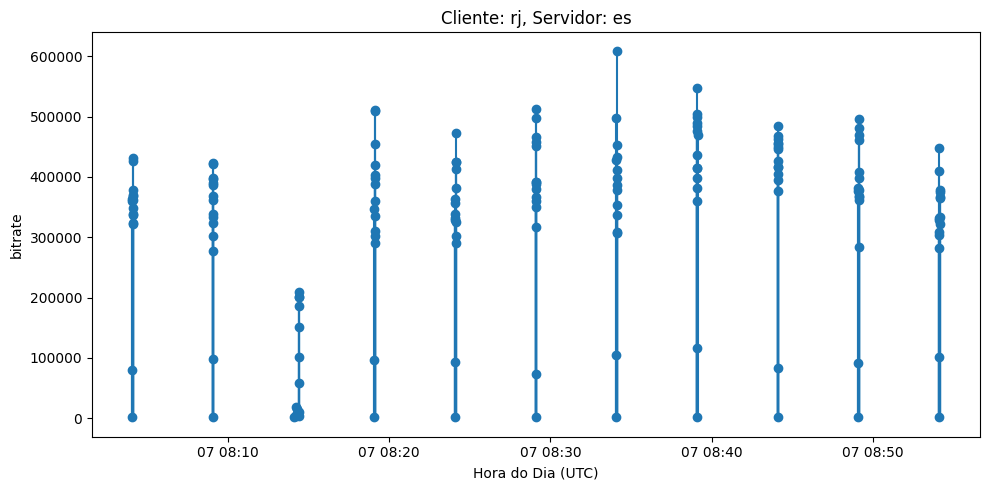

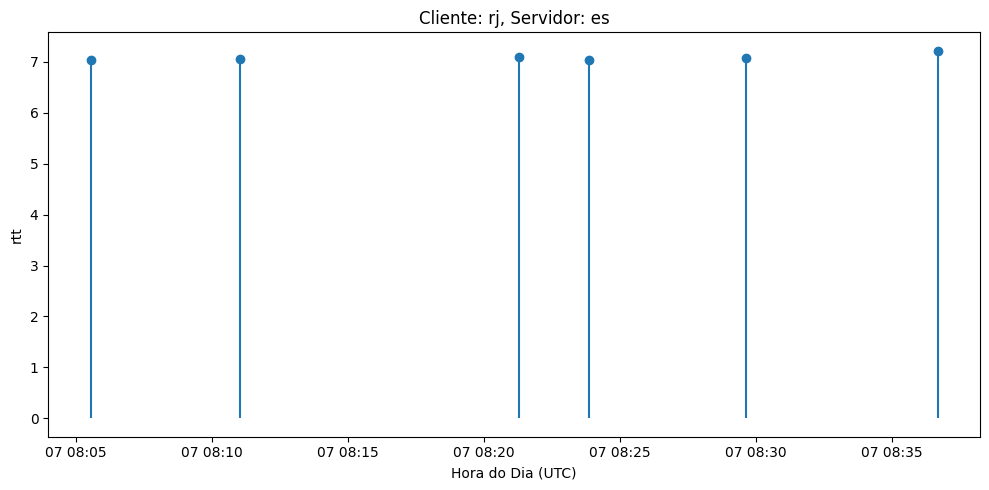

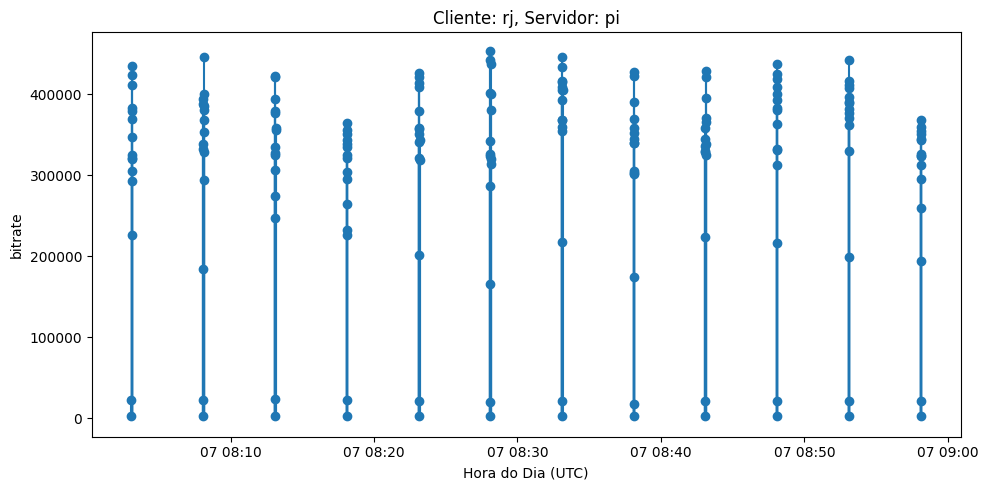

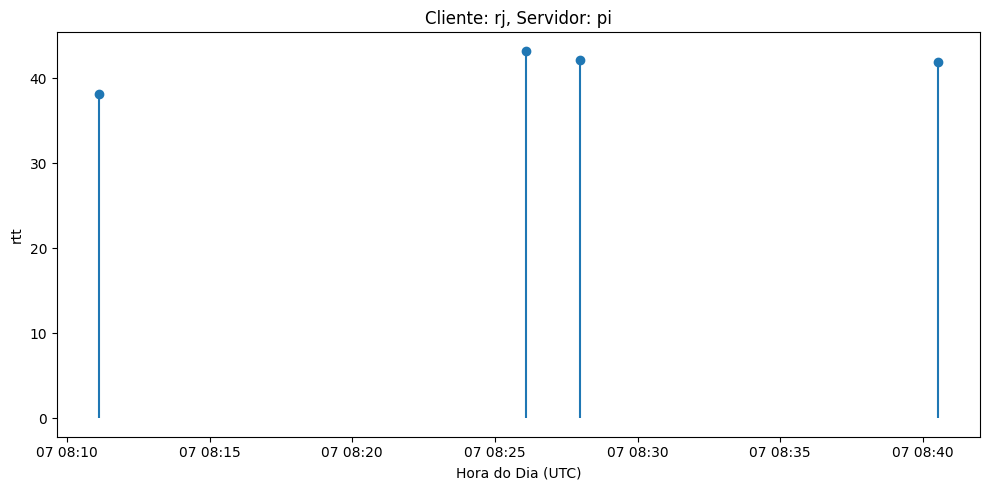

In [21]:
df_bitrate_filtrado = filtrar_intervalo(bitrate_df, inicio = '2024-06-07 08:00', fim = '2024-06-07 08:59' )
df_rtt_filtrado = filtrar_intervalo(rtt_df, inicio = '2024-06-07 08:00', fim = '2024-06-07 08:59' )
pares = df_bitrate_filtrado[['client', 'server']].drop_duplicates()

for _, par in pares.iterrows():
    client = par['client']
    server = par['server']
    plotar_por_par(df_bitrate_filtrado, 'bitrate', client, server)
    plotar_por_par(df_rtt_filtrado, 'rtt', client, server)